# Introduction  

***

## Music Popularity Prediction  

Given *data about the top 50 Spotify songs from 2019*, let's try to predict whether a given song will be **more or less popular**.  
  
We will be using four different models to make our predictions.

# libraries

In [167]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from matplotlib import pyplot as plt



In [168]:
data = pd.read_csv('top50popular.csv', encoding='latin-1')

In [169]:
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [118]:
data

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,0
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,1
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,0
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,0
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,1
5,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,0
6,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,1
7,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,1
8,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,0
9,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,1


In [126]:
data.shape

(50, 14)

# Preprocessing

In [171]:
data = data.drop(['Unnamed: 0', 'Track.Name'], axis=1)

In [172]:
data

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [173]:
data['Popularity'] = pd.qcut(data['Popularity'], q=2, labels=[0, 1])

In [174]:
data.shape

(50, 12)

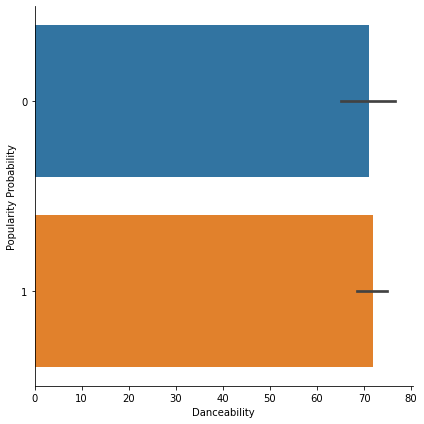

In [175]:
g = sns.catplot(x = "Danceability", y = "Popularity", data = data, kind = "bar", height = 6)
g.set_ylabels("Popularity Probability")
plt.show()

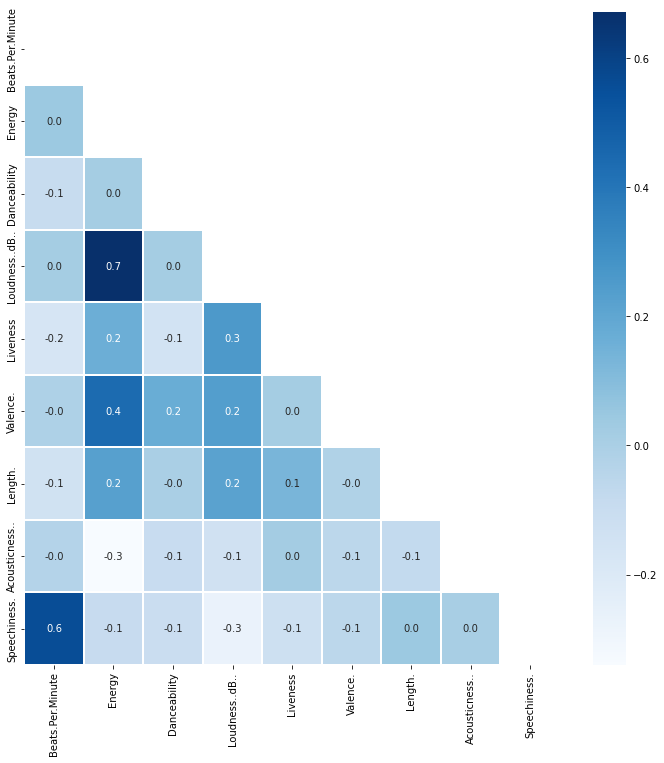

In [176]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [177]:
def bar_plot(variable):
    
    var=data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


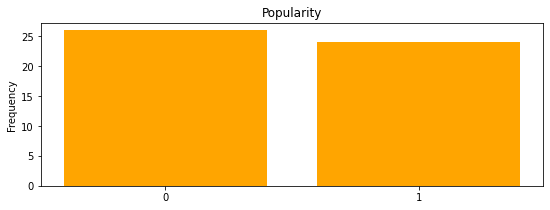

Popularity:
0    26
1    24
Name: Popularity, dtype: int64


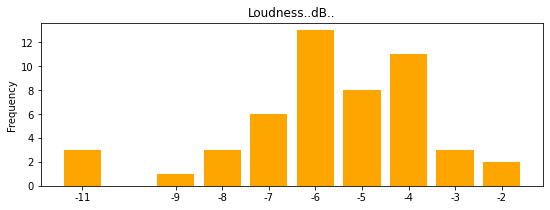

Loudness..dB..:
-6     13
-4     11
-5      8
-7      6
-8      3
-11     3
-3      3
-2      2
-9      1
Name: Loudness..dB.., dtype: int64


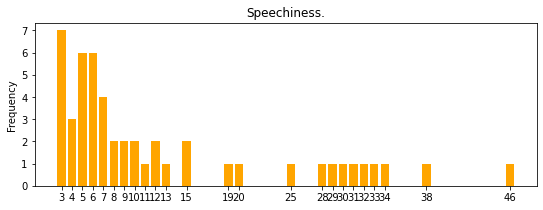

Speechiness.:
3     7
5     6
6     6
7     4
4     3
8     2
9     2
15    2
10    2
12    2
38    1
31    1
20    1
29    1
32    1
19    1
11    1
30    1
46    1
25    1
33    1
28    1
34    1
13    1
Name: Speechiness., dtype: int64


In [178]:
category1 = ["Popularity","Loudness..dB..","Speechiness."]
for c in category1:
    bar_plot(c)
    

C:\Users\tekul\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



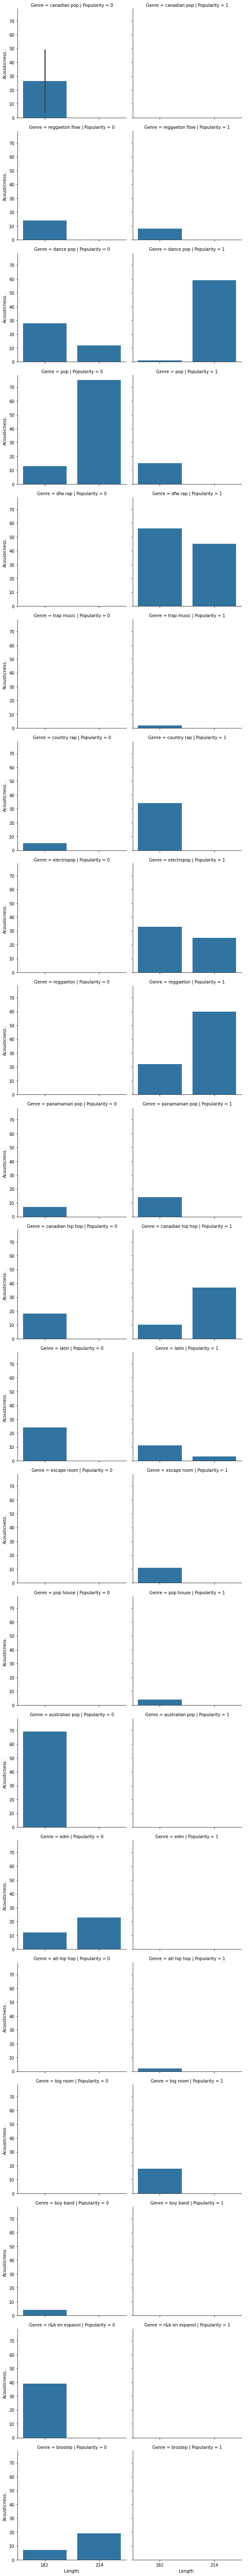

In [179]:
g = sns.FacetGrid(data, row = "Genre", col = "Popularity", height = 4)
g.map(sns.barplot, "Length.", "Acousticness..")
g.add_legend()
plt.show()

## One-Hot Encoding

In [180]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [181]:
data = onehot_encode(data, 'Genre', 'genre')
data = onehot_encode(data, 'Artist.Name', 'artist')

In [182]:
data

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,artist_Post Malone,artist_ROSALÍA,artist_Sam Smith,artist_Sech,artist_Shawn Mendes,artist_Taylor Swift,artist_The Chainsmokers,artist_Tones and I,artist_Y2K,artist_Young Thug
0,117,55,76,-6,8,75,191,4,3,0,...,0,0,0,0,1,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,1,...,0,0,0,0,0,0,0,0,0,0
2,190,80,40,-4,16,70,186,12,46,0,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,0,...,0,0,0,0,0,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,1,...,1,0,0,0,0,0,0,0,0,0
5,102,68,80,-5,9,84,220,9,4,0,...,0,0,0,0,0,0,0,0,0,0
6,180,64,75,-6,7,23,131,2,29,1,...,0,0,0,0,0,0,0,0,0,0
7,111,68,48,-5,8,35,202,15,9,1,...,0,0,1,0,0,0,0,0,0,0
8,136,62,88,-6,11,64,157,5,10,0,...,0,0,0,0,0,0,0,0,0,0
9,135,43,70,-11,10,56,194,33,38,1,...,0,0,0,0,0,0,0,0,0,0


## Splitting and Scaling

In [183]:
y = data.loc[:, 'Popularity']
X = data.drop('Popularity', axis=1)

In [184]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

In [186]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (35, 68)
X_test:  (15, 68)
y_train:  (35,)
y_test:  (15,)


# Modeling and Training

In [187]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
svm_model = SVC()

In [188]:
log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [189]:
log_acc = log_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = dec_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)

In [190]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)
print("Support Vector Machine Accuracy:", svm_acc)

Logistic Regression Accuracy: 0.7333333333333333
K-Nearest-Neighbors Accuracy: 0.5333333333333333
Decision Tree Accuracy: 0.3333333333333333
Support Vector Machine Accuracy: 0.7333333333333333


In [191]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Support Vector Machine"],
    y=[log_acc, knn_acc, dec_acc, svm_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Support Vector Machine"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

## k-fold cross validation

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)


In [193]:
y_pred_lr = log_model.predict(X_test)
y_pred__lr1 = pd.Series(y_pred_lr, name='Predicted')
y_pred__lr1

0     1
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
Name: Predicted, dtype: int64

In [197]:
y_pred_frst = svm_model.predict(X_test)
y_pred__frst2 = pd.Series(y_pred_frst, name='Predicted')
y_pred__frst2

0     1
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
Name: Predicted, dtype: int64

In [198]:
y_actu = pd.Series(y_test, name='Actual')
y_actu

32    1
38    0
17    1
3     0
21    1
15    0
46    0
48    0
37    0
1     1
2     0
5     0
0     0
9     1
16    1
Name: Actual, dtype: category
Categories (2, int64): [0 < 1]

In [199]:
confusion_s1 = pd.crosstab(y_actu, y_pred__lr1)
print(confusion_s1)
print()
confusion_s2 = pd.crosstab(y_actu, y_pred__frst2)
print(confusion_s2)

Predicted  0  1
Actual         
0          2  2
1          2  0

Predicted  0  1
Actual         
0          2  2
1          2  0


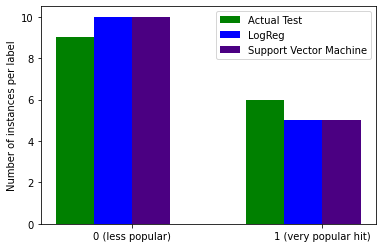

In [200]:
from collections import Counter

def class_distr(Y):
    return zip(*sorted(Counter(Y).items()))

actual_classes, actual_freqs = class_distr(y_actu)
sys1_classes, sys1_freqs = class_distr(y_pred__lr1)
sys2_classes, sys2_freqs = class_distr(y_pred__frst2)

bar_width = 0.2

_ = plt.bar([b-(1.5*bar_width) for b in actual_classes], actual_freqs, bar_width, color='green', label='Actual Test')
_ = plt.bar([b-(0.5*bar_width) for b in sys1_classes], sys1_freqs, bar_width, color='blue', label='LogReg')
_ = plt.bar([b+(0.5*bar_width) for b in sys2_classes], sys2_freqs, bar_width, color='indigo', label='Support Vector Machine')


plt.xticks([0,1], ['0 (less popular)', '1 (very popular hit)'])
plt.ylabel('Number of instances per label')

_ = plt.legend()

In [201]:
import numpy as np
NUM_FOLDS = 10
Y_actu_folds = np.array_split(y_actu, NUM_FOLDS)
Y_sys1_folds = np.array_split(y_pred__lr1, NUM_FOLDS)
Y_sys2_folds = np.array_split(y_pred__frst2, NUM_FOLDS)

freq = Counter(Y_actu_folds[0])
print (freq)

Counter({1: 1, 0: 1})


In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

PRF_KWARGS = {
    'pos_label': 1,     # 1 is the big hit label
    'average': 'binary' # evaluate p/r/f of the positive label
}

Ya0 = Y_actu_folds[0]
Y10 = Y_sys1_folds[0] 
Y20 = Y_sys2_folds[0]

y_actu = pd.Series(Ya0, name='Actual')
y_pred_s1 = pd.Series(Y10, name='Predicted')
y_pred_s2 = pd.Series(Y20, name='Predicted')
confusion_s1 = pd.crosstab(y_actu, y_pred_s1)

print("System 1 accuracy:", accuracy_score(Ya0, Y10))
print("System 2 accuracy:", accuracy_score(Ya0, Y20))
print("System 1 f1 score:", f1_score(Ya0, Y10, **PRF_KWARGS))
print("System 2 f1 score:", f1_score(Ya0, Y20, **PRF_KWARGS))

System 1 accuracy: 1.0
System 2 accuracy: 1.0
System 1 f1 score: 1.0
System 2 f1 score: 1.0


Both models have same accuracy and f1 score after validating using 10 folds. So, here we can either consider logistic regression or svm for the best model